### LIBRERIAS

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

### EJERCICIO MATRIZ 3x3

In [77]:
def generar_matriz(limite_valores):
    vector_a = [random.randint(limite_valores * -1, limite_valores) for _ in range(3)]
    vector_b = [random.randint(limite_valores * -1, limite_valores) for _ in range(3)]
    vector_c = [random.randint(limite_valores * -1, limite_valores) for _ in range(3)]
    matriz = np.array([vector_a, vector_b, vector_c])
    return matriz

def det(matriz):
    determinante = (matriz[0, 0] * matriz[1, 1] * matriz[2, 2]) + \
                   (matriz[0, 1] * matriz[1, 2] * matriz[2, 0]) + \
                   (matriz[0, 2] * matriz[1, 0] * matriz[2, 1]) - \
                   (matriz[0, 2] * matriz[1, 1] * matriz[2, 0]) - \
                   (matriz[0, 0] * matriz[1, 2] * matriz[2, 1]) - \
                   (matriz[0, 1] * matriz[1, 0] * matriz[2, 2])
    return determinante

def seleccionar_submatriz(matriz, indice):
    submatriz_filas = np.delete(matriz, indice, axis=0)
    submatriz_columnas = np.delete(matriz, indice, axis=1)
    return np.delete(submatriz_columnas, indice, axis=0)

def inversa(det, matriz):
    mult = 1 / det
    menos = np.array([[matriz[1,1]*matriz[2,2] - matriz[1,2]*matriz[2,1], matriz[0,2]*matriz[2,1] - matriz[0,1]*matriz[2,2], matriz[0,1]*matriz[1,2] - matriz[0,2]*matriz[1,1]],
                      [matriz[1,2]*matriz[2,0] - matriz[1,0]*matriz[2,2], matriz[0,0]*matriz[2,2] - matriz[0,2]*matriz[2,0], matriz[0,2]*matriz[1,0] - matriz[0,0]*matriz[1,2]],
                      [matriz[1,0]*matriz[2,1] - matriz[1,1]*matriz[2,0], matriz[0,1]*matriz[2,0] - matriz[0,0]*matriz[2,1], matriz[0,0]*matriz[1,1] - matriz[0,1]*matriz[1,0]]])
    invers = mult * menos
    return invers

def final(matriz, inversa):
    multi = np.dot(matriz, inversa).astype(int)
    validacion = np.identity(3)
    if np.array_equal(validacion, multi):
        return True
    else:
        return False

def ejercicio_v2(limite_valores, limite_matrices):
    matrices_si = np.empty((0, 9), dtype=int)
    matrices_no = np.empty((0, 9), dtype=int)
    for _ in range(limite_matrices):
        matriz = generar_matriz(limite_valores)
        determinante = det(matriz)
        if determinante == 0:  
            continue
        inverse = inversa(determinante, matriz)
        vali = final(matriz, inverse)
        vector = matriz.reshape(1, -1)
        if vali:
            matrices_si = np.vstack((matrices_si, vector))
        else:
            matrices_no = np.vstack((matrices_no, vector))
    df_si = pd.DataFrame(data=matrices_si, columns=["A11", "A12", "A13", "A21", "A22", "A23", "A31", "A32", "A33"])
    df_no = pd.DataFrame(data=matrices_no, columns=["A11", "A12", "A13", "A21", "A22", "A23", "A31", "A32", "A33"])
    print('Las siguientes matrices cumplen con la propiedad: A*A^-1 = I')
    print(df_si)
    print('Las siguientes matrices no cumplen con la propiedad A*A^-1 = I')
    print(df_no)

In [78]:
ejercicio_v2(10, 10)

Las siguientes matrices cumplen con la propiedad: A*A^-1 = I
   A11  A12  A13  A21  A22  A23  A31  A32  A33
0   -8   -9    8    3    3    3   -1    6    5
1    3   10  -10    6   10    4    4   -7   10
2    0    8    1    5   -7    4  -10    7    6
3    7  -10   -1    1   -6    9   10    2   -1
4   10    8   -8   -8   10   -7   -4   -3    9
Las siguientes matrices no cumplen con la propiedad A*A^-1 = I
   A11  A12  A13  A21  A22  A23  A31  A32  A33
0    4    6   -3    1    2    7  -10   -7  -10
1   -9   -6    3   10    9    1   -8   -1   -5
2   10    5    5   -5    0    7    8    5    2
3   -5    4   -7    5    5   -6   -2   -8   -2
4    3   -3   -1   -6    8    5   -2    3    8


### EJERCICIO MATRIZ DEFINITIVO

In [79]:
def generar_combinaciones(valores, tamaño):
    rangos = [range(-valores, valores+1) for _ in range(tamaño)]
    combinaciones = product(*rangos)
    return combinaciones

def lista_optimizada(valores, tamaño):
    combinaciones = generar_combinaciones(valores, tamaño)
    df = pd.DataFrame(combinaciones, columns=['A'+str(i) for i in range(1, tamaño+1)])
    #df.to_csv('Lista_datos.csv', index=False)
    return df

def nueva(df):
    validacion = []
    for  index, row in df.iterrows():
        vector_a = np.array([row['A1'], row['A2'], row['A3']])
        vector_b = np.array([row['A4'], row['A5'], row['A6']])
        vector_c = np.array([row['A7'], row['A8'], row['A9']])
        matriz = np.array([vector_a, vector_b, vector_c])
        determinante = np.linalg.det(matriz)
        if determinante != 0 :
            validacion.append('si')
        else:
            validacion.append('no')
    df['validacion'] = validacion
    return df

In [80]:
data = lista_optimizada(2, 9)

In [81]:
df = nueva(data)

### VERSION FINAL 

In [87]:
tamaño = 9
valores = 20
cantidad_registros = 1000000

In [88]:
def lista_optimizada(valores, tamaño, cantidad_registros):
    combinaciones = np.random.choice(range(-5, 5+1), size=(cantidad_registros, tamaño))
    df = pd.DataFrame(combinaciones, columns=['A'+str(i) for i in range(1, tamaño+1)])
    #df.to_csv('Lista_datos.csv', index=False)
    return df

def nueva(df):
    validacion = []
    for  index, row in df.iterrows():
        vector_a = np.array([row['A1'], row['A2'], row['A3']])
        vector_b = np.array([row['A4'], row['A5'], row['A6']])
        vector_c = np.array([row['A7'], row['A8'], row['A9']])
        matriz = np.array([vector_a, vector_b, vector_c])
        determinante = np.linalg.det(matriz)
        if determinante != 0 :
            validacion.append('si')
        else:
            validacion.append('no')
    df['validacion'] = validacion
    return df

In [89]:
data = lista_optimizada(valores, tamaño, cantidad_registros)
df = nueva(data)

In [90]:
dats = pd.DataFrame()
for i in range(1, len(df.columns)):
    asa = df[df['validacion']=="si"]['A'+str(i)].value_counts()
    dats = pd.concat([dats, asa], axis=1, ignore_index=True)
defe = dats.sort_index()
indes = defe.reset_index()['index']

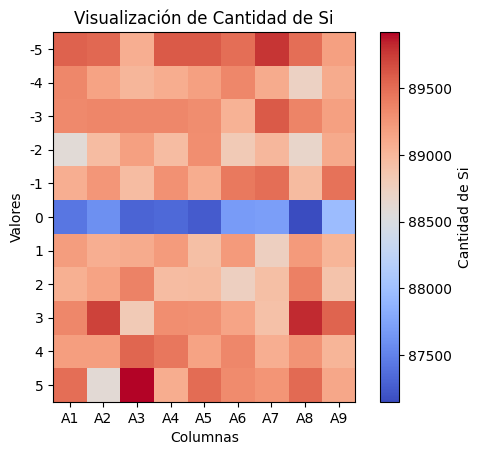

In [92]:
fig, ax = plt.subplots()

imagen = ax.imshow(defe, cmap='coolwarm', interpolation='nearest')

barra_color = fig.colorbar(imagen, ax=ax)
barra_color.set_label('Cantidad de Si')

ax.set_xticks(np.arange(len(df.columns)-1))
ax.set_yticks(np.arange(len(indes)))
ax.set_xticklabels(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'])
ax.set_yticklabels(indes)

plt.title('Visualización de Cantidad de Si')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()